Lenguaje de Programación    0
Porcentaje                  0
dtype: int64

Análisis del Modelo de Regresión Lineal:
- La pendiente del modelo (coeficiente) es: -2.53
- El intercepto del modelo es: 52.88

Interpretación del comportamiento:
- El modelo muestra una relación entre el ranking de popularidad y el porcentaje de uso de los lenguajes de programación.
- El coeficiente de la pendiente (-2.53) sugiere que a medida que aumenta el ranking (menos popularidad), el porcentaje de uso disminuye.
- El intercepto (52.88) indica el valor estimado del porcentaje de uso cuando el ranking es 0, lo cual no es aplicable en el contexto del ranking real, pero es una estimación del modelo.

Análisis más detallado:
- El lenguaje de programación con mayor porcentaje es JavaScript (69.7%), mientras que el de menor porcentaje es Julia (0.9%).
- La regresión muestra una disminución progresiva en el porcentaje de uso a medida que disminuye el ranking, lo que es común en listas de popularidad de lenguajes 

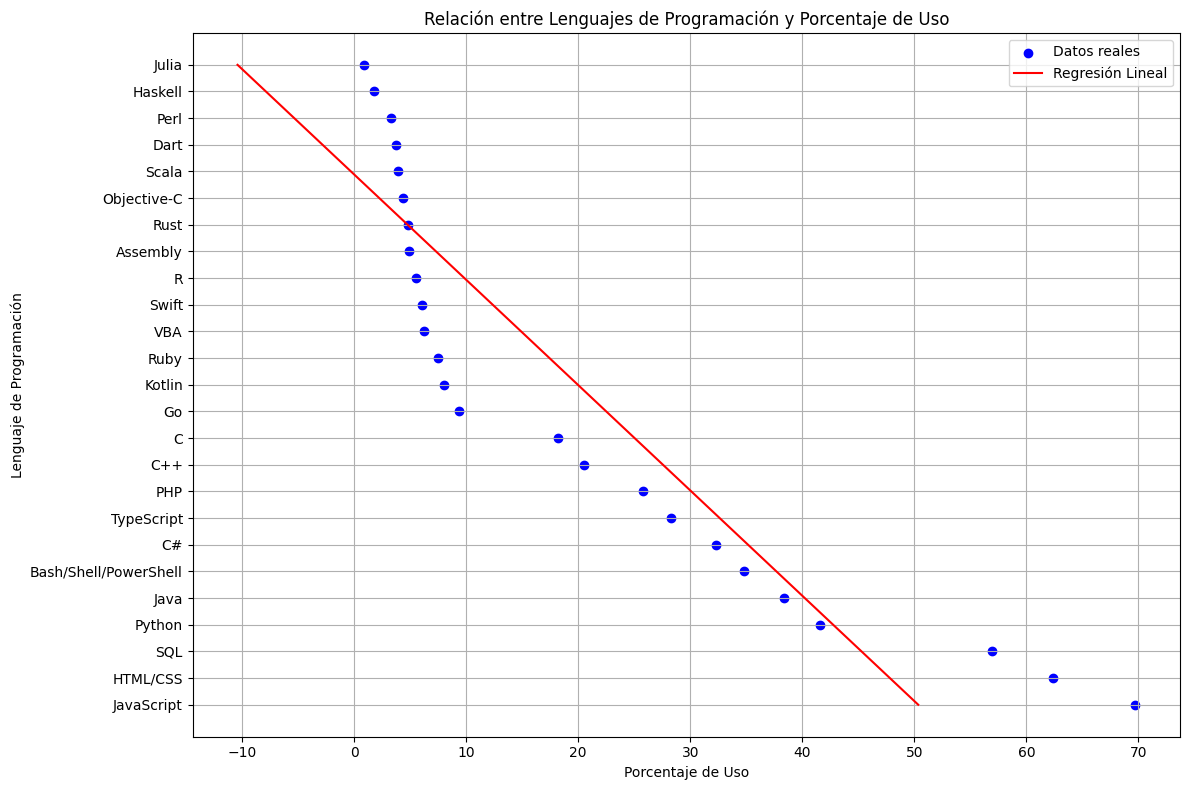

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Leer el archivo CSV
archivo_csv = "lenguajes_Pro.csv"
df = pd.read_csv(archivo_csv)

# Verificar si hay valores NaN en las columnas
print(df.isnull().sum())

# Ordenar por porcentaje y resetear el índice
df = df.sort_values(by="Porcentaje", ascending=False).reset_index(drop=True)
df["Ranking"] = np.arange(1, len(df) + 1)

# Crear variables independientes y dependientes para el modelo
X = df[["Ranking"]].values
y = df["Porcentaje"].values

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Generar predicciones
y_pred = model.predict(X)

# Analizar el modelo
pendiente = model.coef_[0]
intercepto = model.intercept_

# Imprimir análisis dinámico basado en los datos
print("\nAnálisis del Modelo de Regresión Lineal:")
print(f"- La pendiente del modelo (coeficiente) es: {pendiente:.2f}")
print(f"- El intercepto del modelo es: {intercepto:.2f}")
print("\nInterpretación del comportamiento:")
print(f"- El modelo muestra una relación entre el ranking de popularidad y el porcentaje de uso de los lenguajes de programación.")
print(f"- El coeficiente de la pendiente ({pendiente:.2f}) sugiere que a medida que aumenta el ranking (menos popularidad), el porcentaje de uso disminuye.")
print(f"- El intercepto ({intercepto:.2f}) indica el valor estimado del porcentaje de uso cuando el ranking es 0, lo cual no es aplicable en el contexto del ranking real, pero es una estimación del modelo.")
print("\nAnálisis más detallado:")
top_lenguaje = df.iloc[0]["Lenguaje de Programación"]
top_porcentaje = df.iloc[0]["Porcentaje"]
bottom_lenguaje = df.iloc[-1]["Lenguaje de Programación"]
bottom_porcentaje = df.iloc[-1]["Porcentaje"]

print(f"- El lenguaje de programación con mayor porcentaje es {top_lenguaje} ({top_porcentaje}%), mientras que el de menor porcentaje es {bottom_lenguaje} ({bottom_porcentaje}%).")
print(f"- La regresión muestra una disminución progresiva en el porcentaje de uso a medida que disminuye el ranking, lo que es común en listas de popularidad de lenguajes de programación.")
print(f"- El análisis sugiere que existe una correlación negativa entre el ranking y el porcentaje de uso.")

# Configurar el gráfico con los nombres de los lenguajes en el eje y
plt.figure(figsize=(12, 8))
plt.scatter(df["Porcentaje"], df["Lenguaje de Programación"], color="blue", label="Datos reales")
plt.plot(y_pred, df["Lenguaje de Programación"], color="red", label="Regresión Lineal")

# Etiquetas y título
plt.xlabel("Porcentaje de Uso")
plt.ylabel("Lenguaje de Programación")
plt.title("Relación entre Lenguajes de Programación y Porcentaje de Uso")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()